In [24]:
# Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture
from sklearn.manifold import trustworthiness
from scipy import stats
from sklearn.linear_model import BayesianRidge

In [25]:
# preprocessing occupancy bedroom 2021 file
# loading a csv file
df = pd.read_csv("TS052-2021.csv")

# Pivotting the table
pivot_df = df.pivot_table(
    index=["Lower tier local authorities Code", "Lower tier local authorities"],
    columns="Occupancy rating for bedrooms (6 categories)",
    values="Observation",
    aggfunc="sum"  # Use sum in case of duplicates
).reset_index()

# Flattening column names
pivot_df.columns.name = None
pivot_df.columns = [str(col) for col in pivot_df.columns]  # all column names shuld be strings

# Saving to a CSV file
pivot_df.to_csv("Occupancy bedroom 2021.csv", index=False)




In [26]:
# preprocessing occupancy room 2021 file

# Loading a csv file
df = pd.read_csv("TS053-2021.csv")
print(df.head())
# Pivotting the table
pivot_df = df.pivot_table(
    index=["Lower tier local authorities Code", "Lower tier local authorities"],
    columns="Occupancy rating for rooms (6 categories)",
    values="Observation",
    aggfunc="sum"  # Use sum in case of duplicates
).reset_index()

# Flatten column names
pivot_df.columns.name = None
pivot_df.columns = [str(col) for col in pivot_df.columns]  # Ensure all column names are strings

# Save to a new CSV
pivot_df.to_csv("Occupancy rooms 2021.csv", index=False)




  Lower tier local authorities Code Lower tier local authorities  \
0                         E06000001                   Hartlepool   
1                         E06000001                   Hartlepool   
2                         E06000001                   Hartlepool   
3                         E06000001                   Hartlepool   
4                         E06000001                   Hartlepool   

   Occupancy rating for rooms (6 categories) Code  \
0                                              -8   
1                                               1   
2                                               2   
3                                               3   
4                                               4   

  Occupancy rating for rooms (6 categories)  Observation  
0                            Does not apply            0  
1     Occupancy rating of rooms: +2 or more        20016  
2             Occupancy rating of rooms: +1        12148  
3              Occupancy rating of r

In [27]:
# reading 2011 census files - tenure , occupancy rooms and occupancy bedroom
tenure_2011 = pd.read_csv("Tenure 2011.csv")
rooms_2011 = pd.read_csv("Occupancy rooms 2011.csv")
bedroom_2011 = pd.read_csv("Occupancy bedroom 2011.csv")

In [28]:
# Strip column names
for df in [tenure_2011, rooms_2011, bedroom_2011]:
    df.columns = df.columns.str.strip()

# Merge 2011 files together
merged_1 = pd.merge(tenure_2011, rooms_2011, on=["geography", "geography code"], how="outer", suffixes=('', '_rooms'))
merged_2 = pd.merge(merged_1, rooms_2011, on=["geography", "geography code"], how="outer", suffixes=('', '_bedrooms'))
merged_2011 = pd.merge(merged_2, bedroom_2011, on=["geography", "geography code"], how="outer", suffixes=('', '_household'))

merged_2011.drop(columns=["Tenure: Social rented; measures: Value","Tenure: Private rented; measures: Value","Tenure: Owned; measures: Value","Occupancy Rating: All categories: Occupancy rating (rooms); measures: Value","Occupancy Rating: All categories: Occupancy rating (rooms); measures: Value_bedrooms","Occupancy Rating: All categories: Occupancy rating bedrooms; measures: Value","Tenure: All households; measures: Value","Rural Urban","date_rooms","Rural Urban_rooms","date_bedrooms","Rural Urban_bedrooms","date_household","Rural Urban_household","Rural Urban_household"], inplace=True)

# top rows
merged_2011.head()

,date,geography,geography code,Tenure: Owned: Owned outright; measures: Value,Tenure: Owned: Owned with a mortgage or loan; measures: Value,Tenure: Shared ownership (part owned and part rented); measures: Value,Tenure: Social rented: Rented from council (Local Authority); measures: Value,Tenure: Social rented: Other; measures: Value,Tenure: Private rented: Private landlord or letting agency; measures: Value,Tenure: Private rented: Other; measures: Value,...,Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value_bedrooms,Occupancy Rating: Occupancy rating (rooms) of +1; measures: Value_bedrooms,Occupancy Rating: Occupancy rating (rooms) of 0; measures: Value_bedrooms,Occupancy Rating: Occupancy rating (rooms) of -1; measures: Value_bedrooms,Occupancy Rating: Occupancy rating (rooms) of -2 or less; measures: Value_bedrooms,Occupancy Rating: Occupancy rating (bedrooms) of +2 or more; measures: Value,Occupancy Rating: Occupancy rating (bedrooms) of +1; measures: Value,Occupancy Rating: Occupancy rating (bedrooms) of 0; measures: Value,Occupancy Rating: Occupancy rating (bedrooms) of -1; measures: Value,Occupancy Rating: Occupancy rating (bedrooms) of -2 or less; measures: Value
0,2011,Barking and Dagenham,E09000002,11908,20416,906,19782,3677,11559,769,...,17238,17278,21130,9593,4442,11661,20601,28024,7794,1601
1,2011,Barnet,E09000003,38105,40245,1191,11664,7670,33175,1679,...,52218,28485,30724,15761,8728,37823,39766,44691,11291,2345
2,2011,Barnsley,E08000016,30778,34029,445,17831,3201,11812,1044,...,50710,29165,16539,3505,815,35458,40924,21972,2171,209
3,2011,Bath and North East Somerset,E06000022,25827,23241,368,2528,8086,11408,1039,...,40661,14810,12972,4048,1024,28856,23735,18809,1938,177
4,2011,Bedford,E06000055,20018,21919,665,1155,9097,9310,800,...,34918,12515,11494,3561,1324,25013,19788,16381,2200,430


In [29]:
# save merge 2011 file into csv
merged_2011.to_csv("merged_2011.csv", index=False)

In [30]:
# Load 2011 merged csv file
df1 = pd.read_csv('merged_2011.csv')

# renaming the columns from 2011 dataset
rename_map = {
    "Tenure: Owned: Owned outright; measures: Value":"Owned: Owns outright",
    "Tenure: Owned: Owned with a mortgage or loan; measures: Value":"Owned: Owns with a mortgage or loan",
    "Tenure: Shared ownership (part owned and part rented); measures: Value":"Shared ownership: Shared ownership",
    "Tenure: Social rented: Rented from council (Local Authority); measures: Value":"Social rented: Rents from council or Local Authority",
    "Tenure: Social rented: Other; measures: Value":"Social rented: Other social rented",
    "Tenure: Private rented: Private landlord or letting agency; measures: Value":"Private rented: Private landlord or letting agency",
    "Tenure: Private rented: Other; measures: Value":"Private rented: Other private rented",
    "Tenure: Living rent free; measures: Value":"Lives rent free",
    "Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value":"Occupancy rating of rooms: +2 or more",
    "Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value":"Occupancy rating of rooms: +2 or more",
    "Occupancy Rating: Occupancy rating (rooms) of +1; measures: Value":"Occupancy rating of rooms: +1",
    "Occupancy Rating: Occupancy rating (rooms) of 0; measures: Value":"Occupancy rating of rooms: 0",
    "Occupancy Rating: Occupancy rating (rooms) of -1; measures: Value":"Occupancy rating of rooms: -1",
    "Occupancy Rating: Occupancy rating (rooms) of -2 or less; measures: Value":"Occupancy rating of rooms: -2 or less",
    "Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value_bedrooms":"Occupancy rating of rooms: +2 or more_bedrooms",
    "Occupancy Rating: Occupancy rating (rooms) of +1; measures: Value_bedrooms":"Occupancy rating of rooms: +1_bedrooms",
    "Occupancy Rating: Occupancy rating (rooms) of 0; measures: Value_bedrooms":"Occupancy rating of rooms: 0_bedrooms",
    "Occupancy Rating: Occupancy rating (rooms) of -1; measures: Value_bedrooms":"Occupancy rating of rooms: -1_bedrooms",
    "Occupancy Rating: Occupancy rating (rooms) of -2 or less; measures: Value_bedrooms":"Occupancy rating of rooms: -2 or less_bedrooms",
    "Occupancy Rating: Occupancy rating (bedrooms) of +2 or more; measures: Value":"Occupancy rating of bedrooms: +2 or more",
    "Occupancy Rating: Occupancy rating (bedrooms) of +1; measures: Value":"Occupancy rating of bedrooms: +1",
    "Occupancy Rating: Occupancy rating (bedrooms) of 0; measures: Value":"Occupancy rating of bedrooms: 0",
    "Occupancy Rating: Occupancy rating (bedrooms) of -1; measures: Value":"Occupancy rating of bedrooms: -1",
    "Occupancy Rating: Occupancy rating (bedrooms) of -2 or less; measures: Value":"Occupancy rating of bedrooms: -2 or less",
}

# Rename columns in dataset using the mapping
df1 = df1.rename(columns=rename_map)

# Save the renamed dataset
df1.to_csv('2011_merged_renamed.csv', index=False)



In [31]:
# Reading 2021 data files
tenure_2021 = pd.read_csv("tenure 2021.csv")
rooms_2021 = pd.read_csv("Occupancy rooms 2021.csv")
bedrooms_2021 = pd.read_csv("Occupancy bedroom 2021.csv")

In [32]:
# Read the CSV files
tenure_2021 = pd.read_csv("tenure 2021.csv")
rooms_2021 = pd.read_csv("Occupancy rooms 2021.csv")
bedrooms_2021 = pd.read_csv("Occupancy bedroom 2021.csv")

# List of dataframes
dfs = [tenure_2021, rooms_2021, bedrooms_2021]

# Process each DataFrame
for i, df in enumerate(dfs):
    # Rename columns
    df.rename(columns={
        "Lower tier local authorities Code": "geography code",
        "Lower tier local authorities": "geography"
    }, inplace=True)

    if "Does not apply" in df.columns:
        df.drop(columns=["Does not apply"], inplace=True)

# Unpack the cleaned dataframes
tenure_2021, rooms_2021, bedrooms_2021 = dfs

# Checking one of them
tenure_2021.head()


,geography code,geography,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority
0,E06000001,Hartlepool,68,12761,11073,856,6338,239,5608,3986
1,E06000002,Middlesbrough,115,17224,15913,1391,11286,330,7233,6773
2,E06000003,Redcar and Cleveland,41,22649,17205,1338,8410,346,6380,5269
3,E06000004,Stockton-on-Tees,79,27726,27686,1819,12388,385,6469,7204
4,E06000005,Darlington,20,16222,14474,1043,9035,190,2819,5112


In [33]:
# Saving the cleaned DataFrames to new CSV files
tenure_2021.to_csv("tenure_2021_cleaned.csv", index=False)
rooms_2021.to_csv("rooms_2021_cleaned.csv", index=False)
bedrooms_2021.to_csv("bedrooms_2021_cleaned.csv", index=False)


In [34]:
# Strip column names
for df in [tenure_2021, rooms_2021, bedrooms_2021]:
    df.columns = df.columns.str.strip()

# Merge
merged_1 = pd.merge(tenure_2021, rooms_2021, on=["geography", "geography code"], how="outer", suffixes=('', '_rooms'))
merged_2 = pd.merge(merged_1, rooms_2021, on=["geography", "geography code"], how="outer", suffixes=('', '_bedrooms'))
merged_2021 = pd.merge(merged_2, bedrooms_2021, on=["geography", "geography code"], how="outer", suffixes=('', '_household'))

merged_2021.insert(0, 'date', 2021)

# checking the merged data
merged_2021.head()

,date,geography code,geography,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,...,Occupancy rating of rooms: +1_bedrooms,Occupancy rating of rooms: +2 or more_bedrooms,Occupancy rating of rooms: -1_bedrooms,Occupancy rating of rooms: -2 or less_bedrooms,Occupancy rating of rooms: 0_bedrooms,Occupancy rating of bedrooms: +1,Occupancy rating of bedrooms: +2 or more,Occupancy rating of bedrooms: -1,Occupancy rating of bedrooms: -2 or less,Occupancy rating of bedrooms: 0
0,2021,E07000223,Adur,27,11101,8835,558,3537,184,1005,...,8715,11207,1433,177,6146,10679,8701,742,91,7465
1,2021,E07000026,Allerdale,10,18770,11276,1122,4241,241,7217,...,13512,23806,819,93,5743,16620,19871,425,43,7014
2,2021,E07000032,Amber Valley,51,23051,17474,1061,7174,297,4867,...,17345,28635,1308,159,8830,21453,23033,806,73,10912
3,2021,E07000224,Arun,56,32182,19588,1424,11801,836,3564,...,21975,31858,3499,428,14901,26586,25931,1944,224,17976
4,2021,E07000170,Ashfield,111,19484,17266,1036,8261,221,1995,...,17123,26488,1699,252,8946,21250,20697,1097,127,11339


In [35]:
# final merged 2021 file
merged_2021.to_csv("merged_2021.csv", index=False)

In [36]:
df_2011 = pd.read_csv("2011_merged_renamed.csv")
df_2021 = pd.read_csv("merged_2021.csv")
common_geo  = df_2011[df_2011['geography'].isin(df_2021['geography'])]
df_combined = pd.concat([common_geo, df_2021[df_2021['geography'].isin(df_2011['geography'])]], ignore_index=True)

# combined file
df_combined.to_csv("merge_all.csv", index=False)

# Check the final output
df_combined


,date,geography,geography code,Owned: Owns outright,Owned: Owns with a mortgage or loan,Shared ownership: Shared ownership,Social rented: Rents from council or Local Authority,Social rented: Other social rented,Private rented: Private landlord or letting agency,Private rented: Other private rented,...,Occupancy rating of rooms: +2 or more_bedrooms,Occupancy rating of rooms: +1_bedrooms,Occupancy rating of rooms: 0_bedrooms,Occupancy rating of rooms: -1_bedrooms,Occupancy rating of rooms: -2 or less_bedrooms,Occupancy rating of bedrooms: +2 or more,Occupancy rating of bedrooms: +1,Occupancy rating of bedrooms: 0,Occupancy rating of bedrooms: -1,Occupancy rating of bedrooms: -2 or less
0,2011,Barking and Dagenham,E09000002,11908,20416,906,19782,3677,11559,769,...,17238,17278,21130,9593,4442,11661,20601,28024,7794,1601
1,2011,Barnet,E09000003,38105,40245,1191,11664,7670,33175,1679,...,52218,28485,30724,15761,8728,37823,39766,44691,11291,2345
2,2011,Barnsley,E08000016,30778,34029,445,17831,3201,11812,1044,...,50710,29165,16539,3505,815,35458,40924,21972,2171,209
3,2011,Bath and North East Somerset,E06000022,25827,23241,368,2528,8086,11408,1039,...,40661,14810,12972,4048,1024,28856,23735,18809,1938,177
4,2011,Bedford,E06000055,20018,21919,665,1155,9097,9310,800,...,34918,12515,11494,3561,1324,25013,19788,16381,2200,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2021,Wirral,E08000015,51333,41781,887,5611,16454,24397,2694,...,80068,38398,21392,3030,364,60047,50582,30267,2109,246
282,2021,Wokingham,E06000041,24952,27647,1426,2844,2487,8665,1117,...,39557,16463,10889,2004,251,33715,21030,13047,1230,142
283,2021,Wolverhampton,E08000031,31345,26465,445,19761,6723,17922,2084,...,44577,28420,25507,5484,1153,31885,34551,32648,5120,936
284,2021,Wrexham,W06000006,19947,16271,182,9958,2203,7890,1276,...,27698,17253,10781,1883,298,21824,20894,13753,1276,167


In [37]:
missing_summary = df_combined.isnull().sum()
missing_summary

,0
date,0
geography,0
geography code,0
Owned: Owns outright,0
Owned: Owns with a mortgage or loan,0
Shared ownership: Shared ownership,0
Social rented: Rents from council or Local Authority,0
Social rented: Other social rented,0
Private rented: Private landlord or letting agency,0
Private rented: Other private rented,0


In [38]:
# Dashboard 1 analysis

# Dataset read
merge_all = pd.read_csv('merge_all.csv')


# claculating total rooms and bedrooms
merge_all['Total (Rooms)'] = (
    merge_all['Occupancy rating of rooms: +2 or more'] +
    merge_all['Occupancy rating of rooms: +1'] +
    merge_all['Occupancy rating of rooms: 0'] +
    merge_all['Occupancy rating of rooms: -1'] +
    merge_all['Occupancy rating of rooms: -2 or less']
)
merge_all['Total (Bedrooms)'] = (
    merge_all['Occupancy rating of bedrooms: +2 or more'] +
    merge_all['Occupancy rating of bedrooms: +1'] +
    merge_all['Occupancy rating of bedrooms: 0'] +
    merge_all['Occupancy rating of bedrooms: -1'] +
    merge_all['Occupancy rating of bedrooms: -2 or less']
)



total_rooms = merge_all['Total (Rooms)']
total_bedrooms = merge_all['Total (Bedrooms)']

# Analysis for overcrowding and under-occupied
merge_all['% Overcrowded (Rooms)'] = (
    merge_all['Occupancy rating of rooms: -1'] +
    merge_all['Occupancy rating of rooms: -2 or less']
) /merge_all['Total (Rooms)']* 100

merge_all['% Overcrowded (Bedrooms)'] = (
    merge_all['Occupancy rating of bedrooms: -1'] +
    merge_all['Occupancy rating of bedrooms: -2 or less']
) / merge_all['Total (Bedrooms)'] * 100

merge_all['% Under-occupied (Rooms)'] = (
    merge_all['Occupancy rating of rooms: +1'] +
    merge_all['Occupancy rating of rooms: +2 or more']
) / merge_all['Total (Rooms)'] * 100

merge_all['% Under-occupied (Bedrooms)'] = (
    merge_all['Occupancy rating of bedrooms: +1'] +
    merge_all['Occupancy rating of bedrooms: +2 or more']
) / merge_all['Total (Bedrooms)'] * 100


merge_all.to_csv('merged_all.csv', index=False)


In [39]:
# Dashboard 2 Analysis

# Load the merged data
file_path = 'merged_all.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# total households from all tenure-related columns
original_tenure_cols = [
    'Owned: Owns outright',
    'Owned: Owns with a mortgage or loan',
    'Shared ownership: Shared ownership',
    'Social rented: Rents from council or Local Authority',
    'Social rented: Other social rented',
    'Private rented: Private landlord or letting agency',
    'Private rented: Other private rented',
    'Lives rent free'
]

df['Total Households'] = df[original_tenure_cols].sum(axis=1)

# Create new tenure groups
df['Owned'] = df['Owned: Owns outright'] + df['Owned: Owns with a mortgage or loan']
df['Shared Ownership'] = df['Shared ownership: Shared ownership']
df['Social Rent'] = df['Social rented: Rents from council or Local Authority'] + df['Social rented: Other social rented']
df['Private Rent'] = df['Private rented: Private landlord or letting agency'] + df['Private rented: Other private rented']
df['Other'] = df['Lives rent free']


# percentage using total households
tenure_cols = ['Owned', 'Social Rent', 'Private Rent', 'Shared Ownership', 'Other']
for col in tenure_cols:
    df[col] = round((df[col] / df['Total Households']) * 100, 2)


df.to_csv('merge_final.csv', index=False)



In [40]:
# Scaling the data
df = pd.read_csv("merge_final.csv")
geo = df[["geography", "geography code"]]
features = df.drop(columns=["geography", "geography code", "date"])
scaled = StandardScaler().fit_transform(features)


In [41]:
# Implementing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df = pd.concat([geo, df["date"], pca_df], axis=1)
pca_df.to_csv("pca_projection.csv", index=False)


In [42]:
# Implementing TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=18)
tsne_result = tsne.fit_transform(scaled)
tsne_df = pd.DataFrame(tsne_result, columns=["tSNE1", "tSNE2"])
tsne_df = pd.concat([geo, df["date"], tsne_df], axis=1)
tsne_df.to_csv("tsne_projection.csv", index=False)

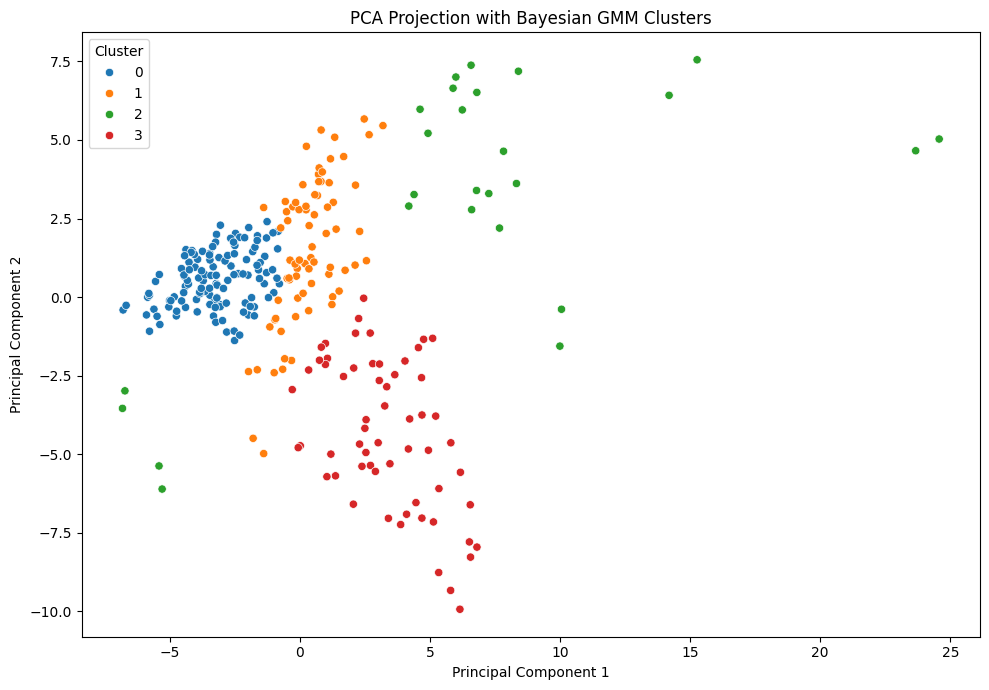

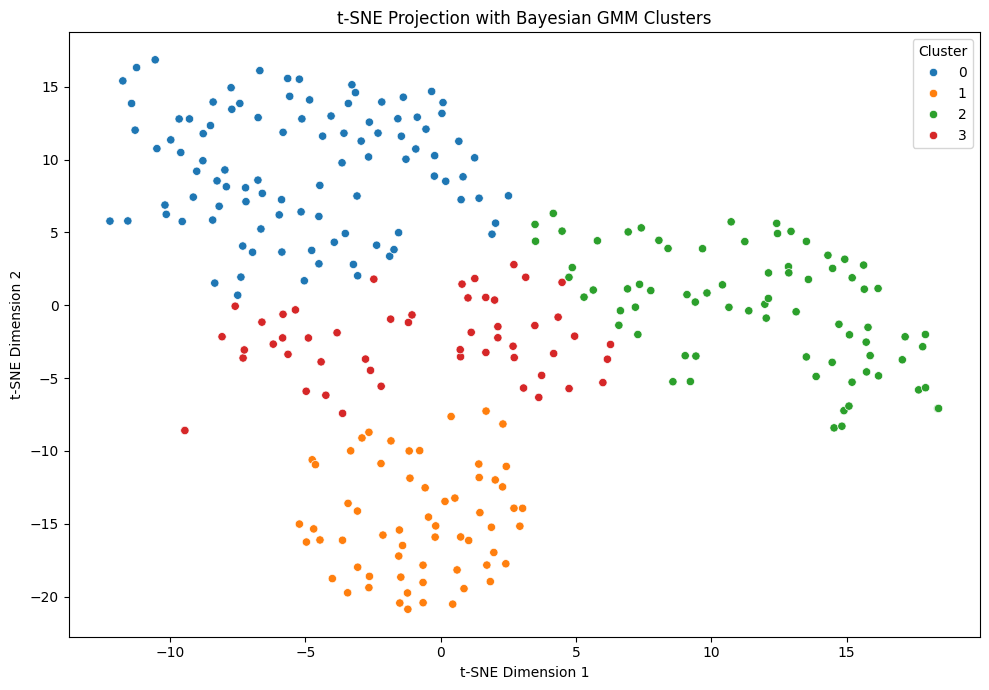

In [43]:
# Load the projected data
pca_df = pd.read_csv("pca_projection.csv")
tsne_df = pd.read_csv("tsne_projection.csv")

# Bayesian Gaussian Mixture
bgmm = BayesianGaussianMixture(n_components=4, covariance_type='full', random_state=18)

# Fit and predict on PCA
pca_df["Cluster"] = bgmm.fit_predict(pca_df[["PC1", "PC2"]])

# Fit and predict on t-SNE
tsne_df["Cluster"] = bgmm.fit_predict(tsne_df[["tSNE1", "tSNE2"]])

# cluster labels for Tableau
pca_df.to_csv("PCA_clusters.csv", index=False)
tsne_df.to_csv("TSNE_clusters.csv", index=False)

# Plot PCA clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", legend="full"
)
plt.title("PCA Projection with Bayesian GMM Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("pca_clusters_labeled.png", dpi=300)
plt.show()

# Plot t-SNE clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_df, x="tSNE1", y="tSNE2", hue="Cluster", palette="tab10", legend="full"
)
plt.title("t-SNE Projection with Bayesian GMM Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("tsne_clusters_labeled.png", dpi=300)
plt.show()


In [44]:
# Checking the trustworthiness
trust_pca = trustworthiness(scaled, pca_df[["PC1", "PC2"]].values)
trust_tsne = trustworthiness(scaled, tsne_df[["tSNE1", "tSNE2"]].values)

print("PCA Trustworthiness:", trust_pca)
print("t-SNE Trustworthiness:", trust_tsne)

PCA Trustworthiness: 0.9340242491321629
t-SNE Trustworthiness: 0.9838481662222669


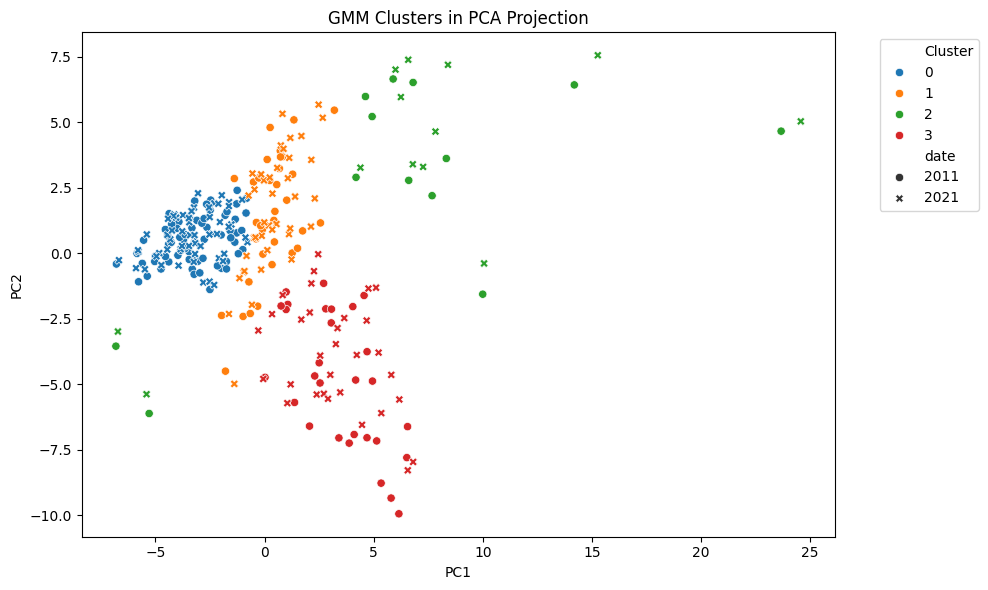

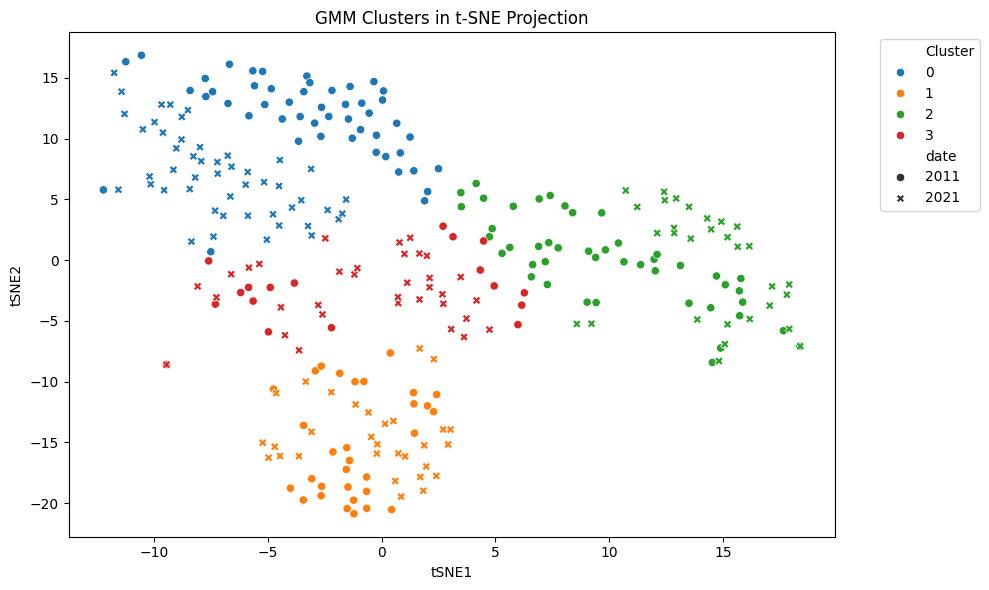

In [45]:
# GMM clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", style="date", palette="tab10")
plt.title("GMM Clusters in PCA Projection")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# GMM clusters in t-SNE space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="tSNE1", y="tSNE2", hue="Cluster", style="date", palette="tab10")
plt.title("GMM Clusters in t-SNE Projection")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [46]:
# using bayesianridge to predict data for 2030

# Load the merged dataset
df = pd.read_csv("merge_final.csv")


# List of metrics to predict
metrics = [
    'Owned', 'Social Rent', 'Private Rent', 'Shared Ownership',
    '% Overcrowded (Rooms)', '% Overcrowded (Bedrooms)',
    '% Under-occupied (Rooms)', '% Under-occupied (Bedrooms)'
]

# function to predict 2030 values using Bayesian Ridge Regression
def predict_2030(df, target_column):
    # pivot table with years as columns
    pivot = df.pivot_table(
        index=['geography', 'geography code'],
        columns='date',
        values=target_column
    ).reset_index()

    pivot = pivot.dropna()

    # Prepare prediction results
    results = []

    # For each local authority
    for _, row in pivot.iterrows():
        la_name = row['geography']
        la_code = row['geography code']
        X = np.array([2011, 2021]).reshape(-1, 1)
        y = np.array([row[2011], row[2021]])

        # Use Bayesian Ridge Regression for prediction
        model = BayesianRidge()
        model.fit(X, y)

        # Predict 2030 value
        X_pred = np.array([[2030]])
        y_pred, std = model.predict(X_pred, return_std=True)

        # 95% credible interval
        lower_ci = y_pred - 1.96 * std
        upper_ci = y_pred + 1.96 * std

        # results
        results.append({
            'geography': la_name,
            'geography code': la_code,
            f'{target_column}_2030': y_pred[0],
            f'{target_column}_2030_lower': lower_ci[0],
            f'{target_column}_2030_upper': upper_ci[0]
        })

    return pd.DataFrame(results)

# predictions for all metrics
all_predictions = {}
for metric in metrics:
    print(f"Predicting {metric} for 2030...")
    predictions = predict_2030(df, metric)
    all_predictions[metric] = predictions

# predictions into one dataframe
result = all_predictions[metrics[0]]
for metric in metrics[1:]:
    result = pd.merge(
        result,
        all_predictions[metric],
        on=['geography', 'geography code'],
        how='inner'
    )

# Save the predictions to CSV
result.to_csv('bayesian_predictions_2030.csv', index=False)



Predicting Owned for 2030...
Predicting Social Rent for 2030...
Predicting Private Rent for 2030...
Predicting Shared Ownership for 2030...
Predicting % Overcrowded (Rooms) for 2030...
Predicting % Overcrowded (Bedrooms) for 2030...
Predicting % Under-occupied (Rooms) for 2030...
Predicting % Under-occupied (Bedrooms) for 2030...
